# Final Exam for MIS 64060 Fundamentals of Machine Learning
### Brenden Hale
###### 12/15/2022
---
Medical Cost Dataset
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

age: age of primary beneficiary

sex: insurance gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

## Import data and packages


In [1]:
import pandas as pd
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv("/content/insurance.csv")

## Data exploration and preprocessing

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
list(df.columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [5]:
df.isna().sum()
# The data set has no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


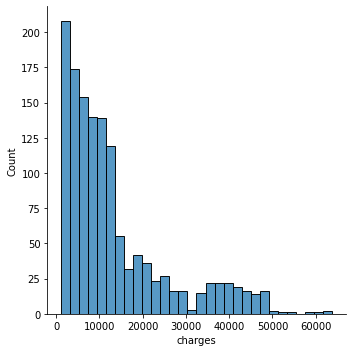

In [7]:
sns.displot(df['charges'])
# As predicted, the medical charges are rightly skewed as the majority of them range from 1,100-10,000

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

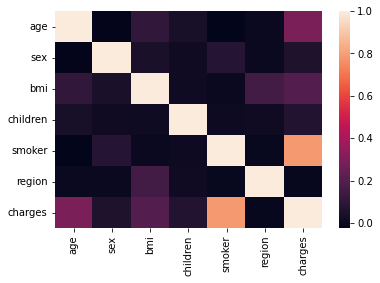

In [8]:
# Correlation matrix to view relationships, what attributes affect medical expenses
corr_data = copy.deepcopy(df)
le = LabelEncoder()
le.fit(corr_data['sex'])
corr_data['sex'] = le.transform(corr_data['sex'])
le.fit(corr_data['smoker'])
corr_data['smoker'] = le.transform(corr_data['smoker'])
le.fit(corr_data['region'])
corr_data['region'] = le.transform(corr_data['region'])
corr = corr_data.corr()
print(corr)
sns.heatmap(corr)
# As observed in the matrix, age and bmi have a moderate correlation, as does bmi and charges
# Age and charges have a strong correlation, which is to be expected
# However, smoking and charges have a stronger correlation as depicted by the hotspots
# We can then rank what attributes greatly affect medical charges
corr['charges'].sort_values()

In [9]:
df = pd.get_dummies(df)

## Training regression model

In [10]:
X = df[set(df.columns)-set(["charges"])]
y = df["charges"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [12]:
# Fit the model with the training data
regressor = linear_model.LinearRegression(fit_intercept=True).fit(X_train, y_train)
# Print the r2 score
print("coefficient of determination: " + str(regressor.score(X_test, y_test)))
# This is an acceptable r2 score for this model

coefficient of determination: 0.7353496266349949


##RandomForestRegressor

In [13]:
forest = rfr(n_estimators = 100, criterion = 'squared_error', random_state = 1, n_jobs = -1)
forest.fit(X_train, y_train)

X_train_pred = forest.predict(X_train)
X_test_pred = forest.predict(X_test)

print('Mean squared error for train data: ' + str(mean_squared_error(y_train, X_train_pred)))
print('Mean squared error for test data: ' + str(mean_squared_error(y_test, X_test_pred)))

print('R squared train data: ' + str(r2_score(y_train, X_train_pred)))
print('R squared test data: ' + str(r2_score(y_test, X_test_pred)))

Mean squared error for train data: 3222393.214951928
Mean squared error for test data: 24345766.71274549
R squared train data: 0.9788440157863545
R squared test data: 0.8234524551326634


## Predicting using the model

### Machine predicted outcomes vs actual outcomes

[('region_northeast', 0.0046968574836455685), ('region_southeast', 0.003999753586714697), ('bmi', 0.20317643704553315), ('children', 0.012446134709621233), ('region_southwest', 0.002625783400795798), ('smoker_yes', 0.3173258486323159), ('region_northwest', 0.004272343022477133), ('smoker_no', 0.31868464654745265), ('sex_female', 0.0030775718486477726), ('sex_male', 0.0031166169015867068), ('age', 0.12657800682120948)]


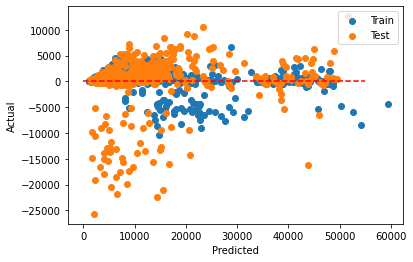

In [14]:
plt.scatter(X_train_pred, X_train_pred - y_train, label = 'Train')
plt.scatter(X_test_pred, X_test_pred - y_test, label = 'Test')
plt.hlines(y = 0, xmin = 0, xmax = 55000, color = 'red', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend(loc = 'upper right')

print(list(zip(forest.feature_names_in_,forest.feature_importances_)))

### Predicting customer medical expenses with profile

In [17]:
new_cust_data = {
    'age': 21,
    'sex_female': 0,
    'sex_male': 1,
    'bmi': 22,
    'children': 0,
    'smoker_no': 1,
    'smoker_yes': 0,
    'region_northeast': 1,
    'region_northwest': 0,
    'region_southeast': 0,
    'region_southwest': 0
}

new_cust_df = pd.DataFrame(new_cust_data,[0])
new_cust_df = new_cust_df.reindex(columns=X_test.columns)
predicition_new_cust = regressor.predict(new_cust_df)
print("New customer has predicted medical expenses of: $%.2f" % (predicition_new_cust))

New customer has predicted medical expenses of: $651.00
